In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [9]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [10]:
def init(mu, sigma, seed_arr, share_init, minutes, color, plot_init):
    loop_var = 0
    for seed in seed_arr:
        np.random.seed(seed)
        global df
        df = pd.DataFrame(columns = ['time', 'stock', 'change', 'share'])
        df['change'] = np.random.normal(mu, sigma, minutes) * 3
        df['time'] = df.index + 1
        df.loc[0, 'stock'] = share_init
        for i in range(1, minutes):
            df.loc[i, 'stock'] = df.loc[(i-1), 'stock'] * (1 + (df.loc[(i - 1), 'change'] / 100))
        if(plot_init == True):
            plt.plot(df['time'], df['stock'], color = color[loop_var])
        loop_var = loop_var + 1

In [11]:
def share_plot(param_arr, color):
    loop_var = 0
    for param in param_arr:
        df.loc[0, 'share'] = 500
        i = 1
        for x in df['time']:
            if(df.loc[(i-1), 'change'] >= param):
                df.loc[i, 'share'] = df.loc[i-1, 'share'] + 100
            elif(df.loc[(i-1), 'change'] <= (param * (-1))):
                if(df.loc[i-1, 'share'] == 0): 
                    df.loc[i, 'share'] = df.loc[i-1, 'share']
                else:
                    df.loc[i, 'share'] = df.loc[i-1, 'share'] - 100
            else:
                df.loc[i, 'share'] = df.loc[i-1, 'share']
            i = i + 1
        plt.plot(df['time'], df['share'], color[loop_var], alpha = 0.8)
        loop_var = loop_var + 1

In [12]:
def share_plot2(param_arr, color):
    loop_var = 0
    for param in param_arr:
        df.loc[[0, 1], 'share'] = 500
        i = 1
        for x in df['time']:
            if((df.loc[(i-1), 'change'] >= param) and (df.loc[(i-2), 'change'] >= param)):
                df.loc[i, 'share'] = df.loc[i-1, 'share'] + 100
            elif(df.loc[(i-1), 'change'] <= (param * (-1)) and (df.loc[(i-2), 'change'] <= (param * (-1)))):
                if(df.loc[i-1, 'share'] == 0): 
                    df.loc[i, 'share'] = df.loc[i-1, 'share']
                else:
                    df.loc[i, 'share'] = df.loc[i-1, 'share'] - 100
            else:
                df.loc[i, 'share'] = df.loc[i-1, 'share']
            i = i + 1
        plt.plot(df['time'], df['share'], color[loop_var], alpha = 0.8, label = "hi")
        loop_var = loop_var + 1

<h2>Single model, single parameter</h2>

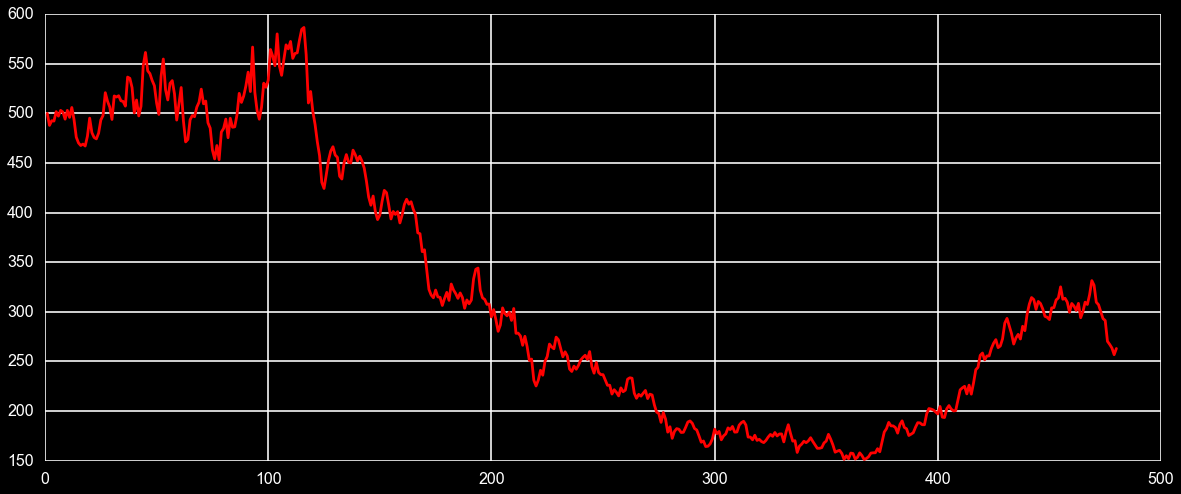

In [13]:
init(mu = 0, sigma = 1, seed_arr = [1000], share_init = 500, minutes = 480, color = 'red', plot_init = True)

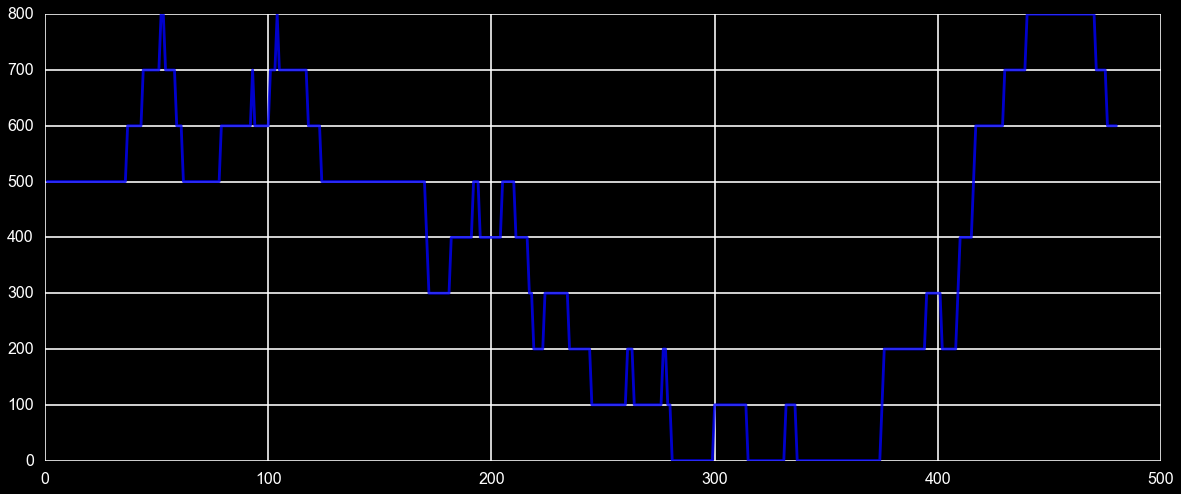

In [14]:
share_plot(param_arr = [5], color = ['blue']) #WITH +-5%

<h2>Varying parameter</h2>

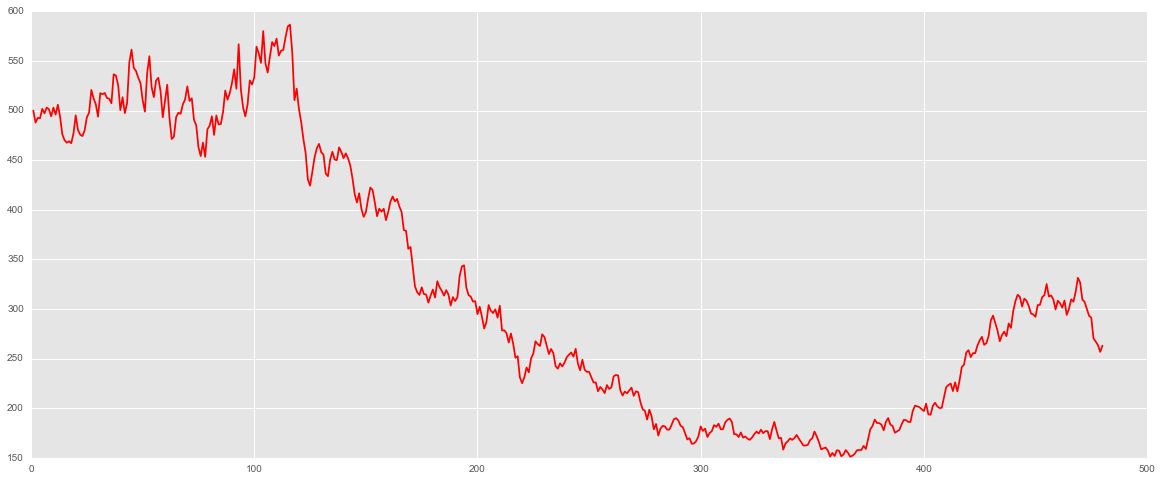

In [8]:
init(mu = 0, sigma = 1, seed_arr = [1000], share_init = 500, minutes = 480, color = 'red', plot_init = True)

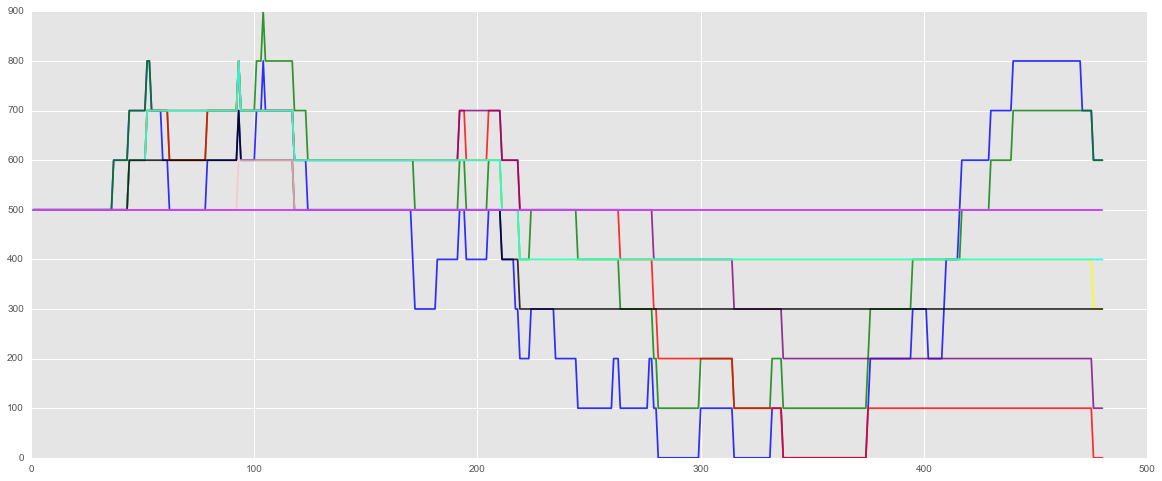

In [9]:
share_plot([5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], color = ['blue', 'green', 'red', 'purple', 'yellow', \
                                                              'cyan', 'black', 'pink', 'aqua', 'magenta'])

<h2>Varying Input</h2>

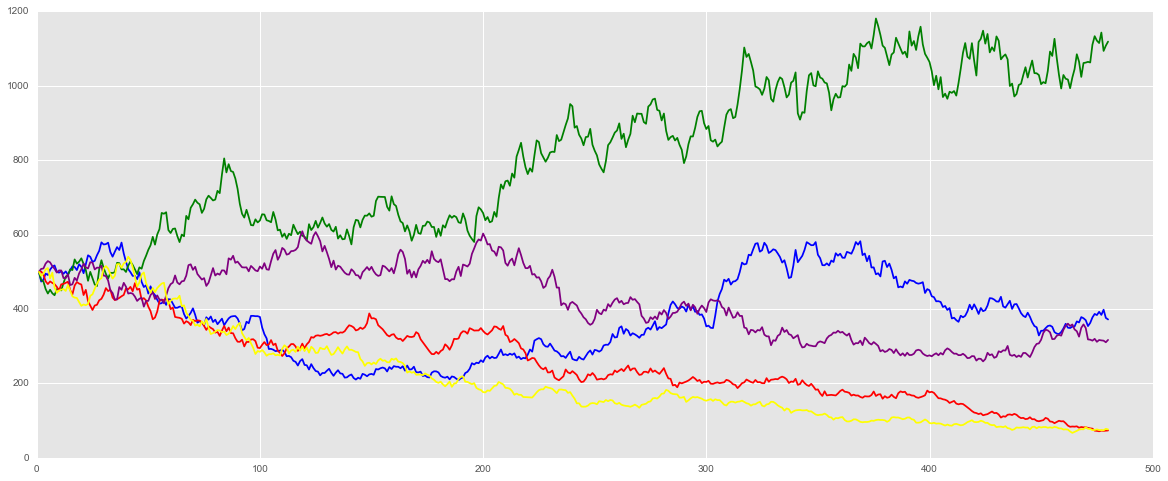

In [10]:
init(mu = 0, sigma = 1, seed_arr = [100, 300, 600, 1200, 1500], share_init = 500, \
     minutes = 480, color = ['blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'black', 'pink', 'aqua', 'magenta'], plot_init = True)

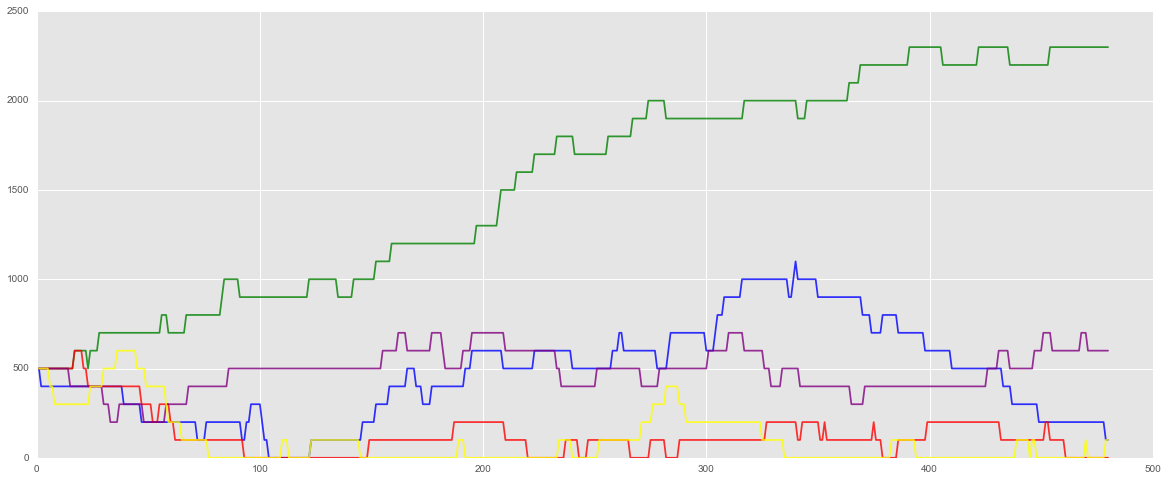

In [11]:
init(mu = 0, sigma = 1, seed_arr = [100], share_init = 500, minutes = 480, color = 'red', plot_init = False)
share_plot(param_arr = [5], color = ['blue']) #WITH +-5%
init(mu = 0, sigma = 1, seed_arr = [300], share_init = 500, minutes = 480, color = 'red', plot_init = False)
share_plot(param_arr = [5], color = ['green']) #WITH +-5%
init(mu = 0, sigma = 1, seed_arr = [600], share_init = 500, minutes = 480, color = 'red', plot_init = False)
share_plot(param_arr = [5], color = ['red']) #WITH +-5%
init(mu = 0, sigma = 1, seed_arr = [1200], share_init = 500, minutes = 480, color = 'red', plot_init = False)
share_plot(param_arr = [5], color = ['purple']) #WITH +-5%
init(mu = 0, sigma = 1, seed_arr = [1500], share_init = 500, minutes = 480, color = 'red', plot_init = False)
share_plot(param_arr = [5], color = ['yellow']) #WITH +-5%

<h2>Multiple Models</h2>

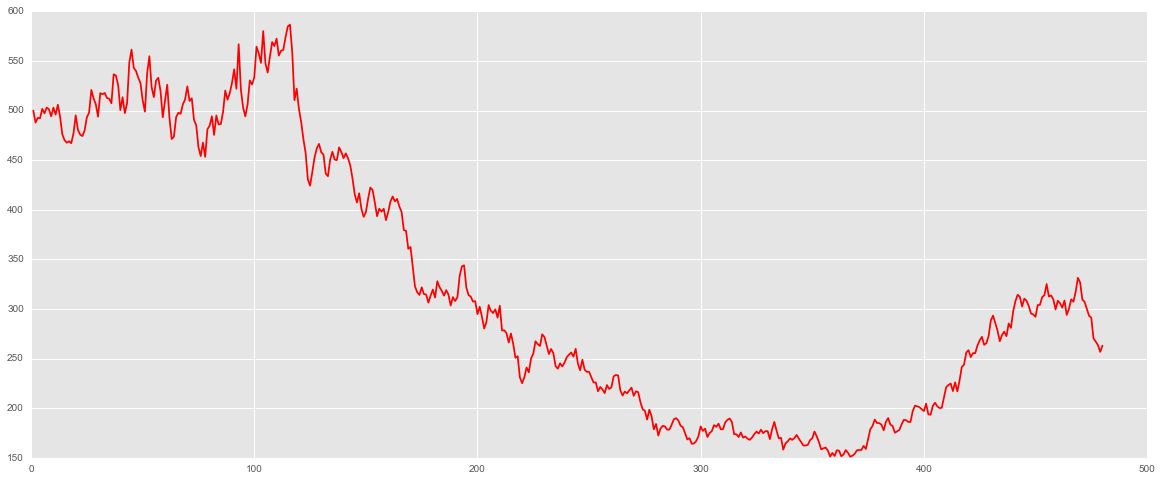

In [12]:
init(mu = 0, sigma = 1, seed_arr = [1000], share_init = 500, minutes = 480, color = 'red', plot_init = True)

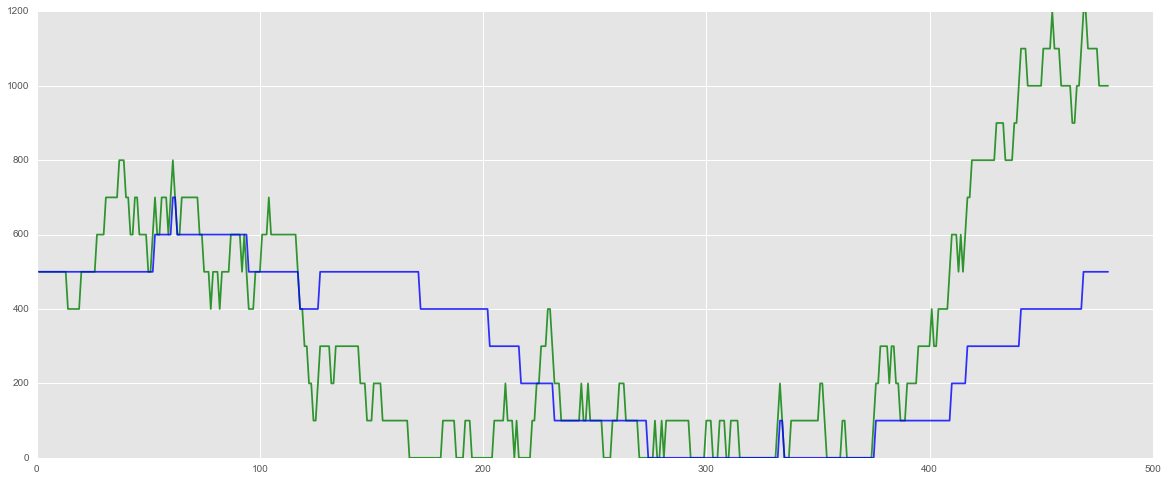

In [19]:
share_plot(param_arr = [3], color = ['green']) #WITH +-3%
share_plot2(param_arr = [3], color = ['blue']) #WITH +-3%